In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [153]:
df = pd.read_csv("dataset.csv")

In [154]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [155]:
df.shape

(10000, 14)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [157]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [158]:
df.duplicated().sum()

np.int64(0)

In [159]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [160]:
df_majority = df[df['Exited'] ==0]
df_minority = df[df['Exited'] ==1]
from sklearn.utils import resample

df_majority_downsampled = resample(df_majority, n_samples= len(df_minority), replace=False)
df = pd.concat([df_minority, df_majority_downsampled])

In [161]:
df = df.sample(frac = 1).reset_index(drop = True)

In [193]:
df.Exited.value_counts()

Exited
0    2037
1    2037
Name: count, dtype: int64

In [162]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,3107,15800890,T'ien,554,France,Female,45,6,0.00,2,1,1,181204.50,0
1,1825,15770498,Parker,798,France,Female,37,4,111723.08,1,1,1,83478.12,0
2,693,15665238,Beneventi,745,Germany,Male,36,8,145071.24,1,0,0,6078.46,0
3,1247,15721189,Kung,666,France,Female,66,7,0.00,2,1,1,99792.82,0
4,1922,15638355,Woods,658,France,Female,35,5,126397.66,1,0,0,156361.58,1


In [163]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis =1)

In [164]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,554,France,Female,45,6,0.00,2,1,1,181204.50,0
1,798,France,Female,37,4,111723.08,1,1,1,83478.12,0
2,745,Germany,Male,36,8,145071.24,1,0,0,6078.46,0
3,666,France,Female,66,7,0.00,2,1,1,99792.82,0
4,658,France,Female,35,5,126397.66,1,0,0,156361.58,1


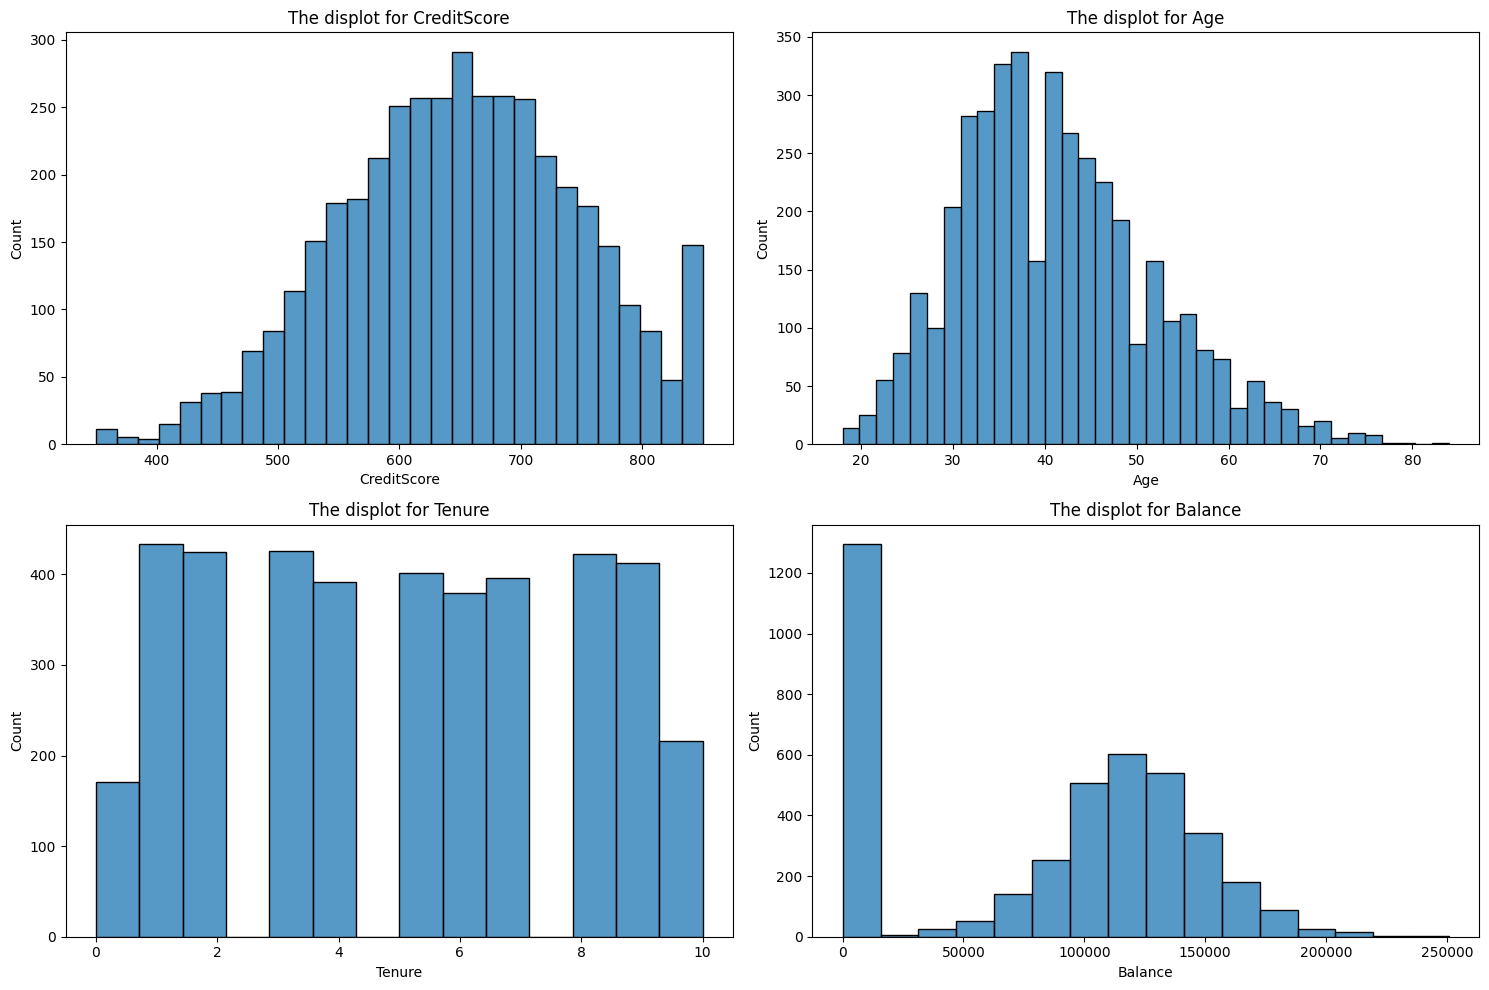

In [165]:
plt.figure(figsize=(15,10))
for i, column in enumerate(['CreditScore', 'Age', 'Tenure', 'Balance']):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[column])
    plt.title(f"The displot for {column}")

plt.tight_layout()


In [166]:
df.Exited.value_counts()

Exited
0    2037
1    2037
Name: count, dtype: int64

In [167]:
df.Geography.value_counts()

Geography
France     1889
Germany    1264
Spain       921
Name: count, dtype: int64

In [168]:
df.Gender.value_counts()

Gender
Male      2086
Female    1988
Name: count, dtype: int64

In [169]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,554,France,Female,45,6,0.00,2,1,1,181204.50,0
1,798,France,Female,37,4,111723.08,1,1,1,83478.12,0
2,745,Germany,Male,36,8,145071.24,1,0,0,6078.46,0
3,666,France,Female,66,7,0.00,2,1,1,99792.82,0
4,658,France,Female,35,5,126397.66,1,0,0,156361.58,1


In [170]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [171]:
num_features = X.select_dtypes(exclude='object').columns
num_features

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [172]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,554,France,Female,45,6,0.00,2,1,1,181204.50,0
1,798,France,Female,37,4,111723.08,1,1,1,83478.12,0
2,745,Germany,Male,36,8,145071.24,1,0,0,6078.46,0
3,666,France,Female,66,7,0.00,2,1,1,99792.82,0
4,658,France,Female,35,5,126397.66,1,0,0,156361.58,1


In [173]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
transformer = ColumnTransformer([
    ('trf1' , OneHotEncoder(drop='first'), ['Geography', 'Gender']),
    ('trf2', StandardScaler(), num_features)

], remainder= 'passthrough')

In [174]:
X = transformer.fit_transform(X)

In [175]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,-0.976249,0.370860,0.336418,-1.338924,0.729076,0.646934,1.082959,1.387076
1,0.0,0.0,0.0,1.504506,-0.387568,-0.346986,0.475209,-0.760521,0.646934,1.082959,-0.297649
2,1.0,0.0,1.0,0.965653,-0.482372,1.019822,1.016708,-0.760521,-1.545753,-0.923396,-1.631957
3,0.0,0.0,0.0,0.162458,2.361735,0.678120,-1.338924,0.729076,0.646934,1.082959,-0.016396
4,0.0,0.0,0.0,0.081122,-0.577175,-0.005284,0.713491,-0.760521,-1.545753,-0.923396,0.958804
...,...,...,...,...,...,...,...,...,...,...,...
4069,1.0,0.0,1.0,0.436968,0.276057,-0.005284,0.684327,0.729076,0.646934,1.082959,-0.926534
4070,0.0,0.0,0.0,-0.112052,1.792914,-0.005284,1.292239,-0.760521,0.646934,1.082959,-0.282416
4071,0.0,1.0,0.0,-0.254390,1.508503,0.678120,-1.338924,-0.760521,-1.545753,-0.923396,-0.286822
4072,0.0,0.0,0.0,0.223460,-0.103158,-0.688688,-1.338924,-0.760521,0.646934,-0.923396,0.214243


In [176]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

In [177]:
X_train.shape

(2851, 11)

In [178]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [179]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,-0.976249,0.370860,0.336418,-1.338924,0.729076,0.646934,1.082959,1.387076
1,0.0,0.0,0.0,1.504506,-0.387568,-0.346986,0.475209,-0.760521,0.646934,1.082959,-0.297649
2,1.0,0.0,1.0,0.965653,-0.482372,1.019822,1.016708,-0.760521,-1.545753,-0.923396,-1.631957
3,0.0,0.0,0.0,0.162458,2.361735,0.678120,-1.338924,0.729076,0.646934,1.082959,-0.016396
4,0.0,0.0,0.0,0.081122,-0.577175,-0.005284,0.713491,-0.760521,-1.545753,-0.923396,0.958804
...,...,...,...,...,...,...,...,...,...,...,...
4069,1.0,0.0,1.0,0.436968,0.276057,-0.005284,0.684327,0.729076,0.646934,1.082959,-0.926534
4070,0.0,0.0,0.0,-0.112052,1.792914,-0.005284,1.292239,-0.760521,0.646934,1.082959,-0.282416
4071,0.0,1.0,0.0,-0.254390,1.508503,0.678120,-1.338924,-0.760521,-1.545753,-0.923396,-0.286822
4072,0.0,0.0,0.0,0.223460,-0.103158,-0.688688,-1.338924,-0.760521,0.646934,-0.923396,0.214243


In [180]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, TensorBoard
from keras.optimizers import Adam
import datetime

In [181]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape = (11,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\adpub\anaconda3\envs\my_ml_env\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [182]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [183]:
model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [184]:
callbacks = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001, 
    patience=2,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,
)

In [185]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=50, callbacks= callbacks)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5990 - loss: 0.6670 - val_accuracy: 0.7145 - val_loss: 0.5843
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7332 - loss: 0.5663 - val_accuracy: 0.7215 - val_loss: 0.5562
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7428 - loss: 0.5465 - val_accuracy: 0.7110 - val_loss: 0.5428
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7433 - loss: 0.5232 - val_accuracy: 0.7373 - val_loss: 0.5268
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7543 - loss: 0.5211 - val_accuracy: 0.7461 - val_loss: 0.5174
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7537 - loss: 0.5153 - val_accuracy: 0.7513 - val_loss: 0.5038
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7675 - loss: 0.4878 - val_accuracy: 0.7688 - val_loss: 0.4981
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7643 - loss: 0.4869 - val_accuracy: 0.7636 - val_loss:

In [186]:
y_prob = model.predict(X_test)

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [187]:
y_pred = np.where(y_prob > 0.5, 1, 0)

In [188]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, y_pred))

0.777596075224857


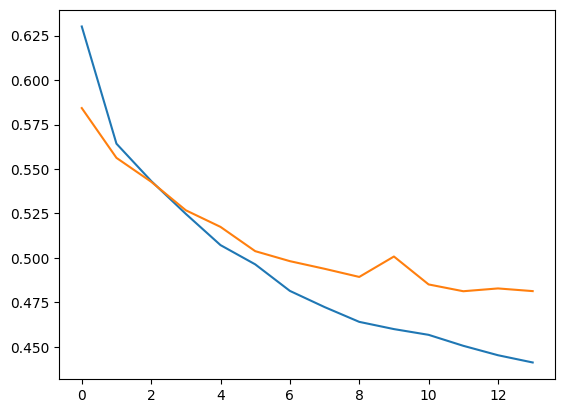

In [189]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

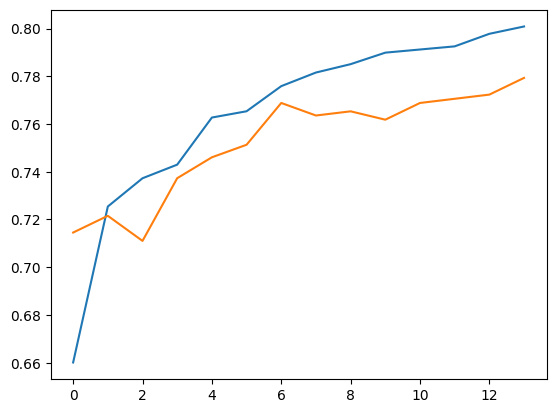

In [190]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [191]:
with open('transformer.pkl', 'wb') as file:
    pickle.dump(transformer, file)

In [192]:
model.save('model.h5')